In [131]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [43]:
LENGTH = 2000
mpl.rcParams['figure.dpi'] = 200

In [47]:
pikachu = pd.read_csv('data/pikachu_complete.csv')
bulbasaur = pd.read_csv('data/bulbasaur_complete.csv')
pikachu = pikachu.sample(n=LENGTH, random_state=1)
bulbasaur = bulbasaur.sample(n=LENGTH, random_state=1)

In [96]:
pikachu_vals = pikachu[['Red', 'Green', 'Blue']]
pikachu_ratio = pikachu[['RedRatio', 'GreenRatio', 'BlueRatio']]
bulbasaur_vals = bulbasaur[['Red', 'Green', 'Blue']]
bulbasaur_ratio = bulbasaur[['RedRatio', 'GreenRatio', 'BlueRatio']]

In [49]:
pikachu_scaler = MinMaxScaler(feature_range=(0, 255))
bulbasaur_scaler = MinMaxScaler(feature_range=(0, 255))

In [50]:
pikachu_vals_scaled = pd.DataFrame(pikachu_scaler.fit_transform(pikachu_vals), columns=pikachu_vals.columns)
bulbasaur_vals_scaled = pd.DataFrame(bulbasaur_scaler.fit_transform(bulbasaur_vals), columns=bulbasaur_vals.columns)

,Red,Green,Blue
0,48.417722,46.064516,37.135922
1,117.816456,111.870968,106.456311
2,53.259494,54.290323,59.417476
3,19.367089,19.741935,17.330097
4,138.797468,144.774194,138.640777
...,...,...,...
1995,72.626582,67.451613,66.844660
1996,33.892405,41.129032,42.087379
1997,109.746835,103.645161,106.456311
1998,20.981013,18.096774,17.330097


In [93]:
def draw_colors_histogram(df):
    """
    Draws the leading colors plot.
    :param hist: histogram of color labels
    """
    # the first two values of np.zeros(...) represent the length of the plot
    # the 3 is because of RGB
    plot_length = 150
    plot = np.zeros((plot_length, LENGTH, 3), dtype="uint8")
    start = 0

    colors = []
    
    # , x[1]['Green'], x[1]['Blue']
    for idx, val in enumerate(sorted(df.to_numpy(), key=lambda x: (x[0]), reverse=True)):
        cv2.rectangle(plot, (int(idx), 0), (int(idx+1), plot_length),
                      color=list(val), thickness=-1)

    plt.axis("off")
    plt.imshow(plot)
    plt.show()

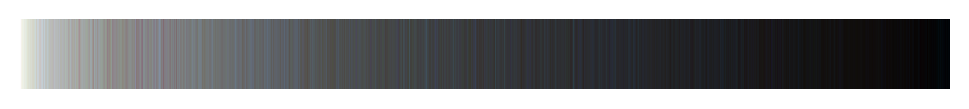

In [94]:
draw_colors_histogram(pikachu_vals_scaled)

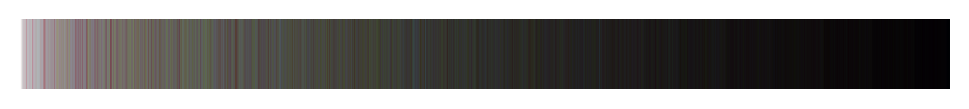

In [95]:
draw_colors_histogram(bulbasaur_vals_scaled)

In [68]:
def draw_3d_plot(colors):
    r, g, b = zip(*colors)
    r = np.array(r) / 255.0
    g = np.array(b) / 255.0
    b = np.array(b) / 255.0

    x = np.array(colors)
    print(x/255.0)

    fig = plt.figure()
    ax = Axes3D(fig)
    # range is 0 to 1
    ax.scatter(r, g, b, c=x/256.0)
    ax.set_title("Pixel 3D plot")
    fig.set_size_inches(14, 8)
    plt.show()

[[0.18987342 0.18064516 0.14563107]
 [0.46202532 0.43870968 0.41747573]
 [0.20886076 0.21290323 0.23300971]
 ...
 [0.43037975 0.40645161 0.41747573]
 [0.08227848 0.07096774 0.06796117]
 [0.59493671 0.61290323 0.58252427]]


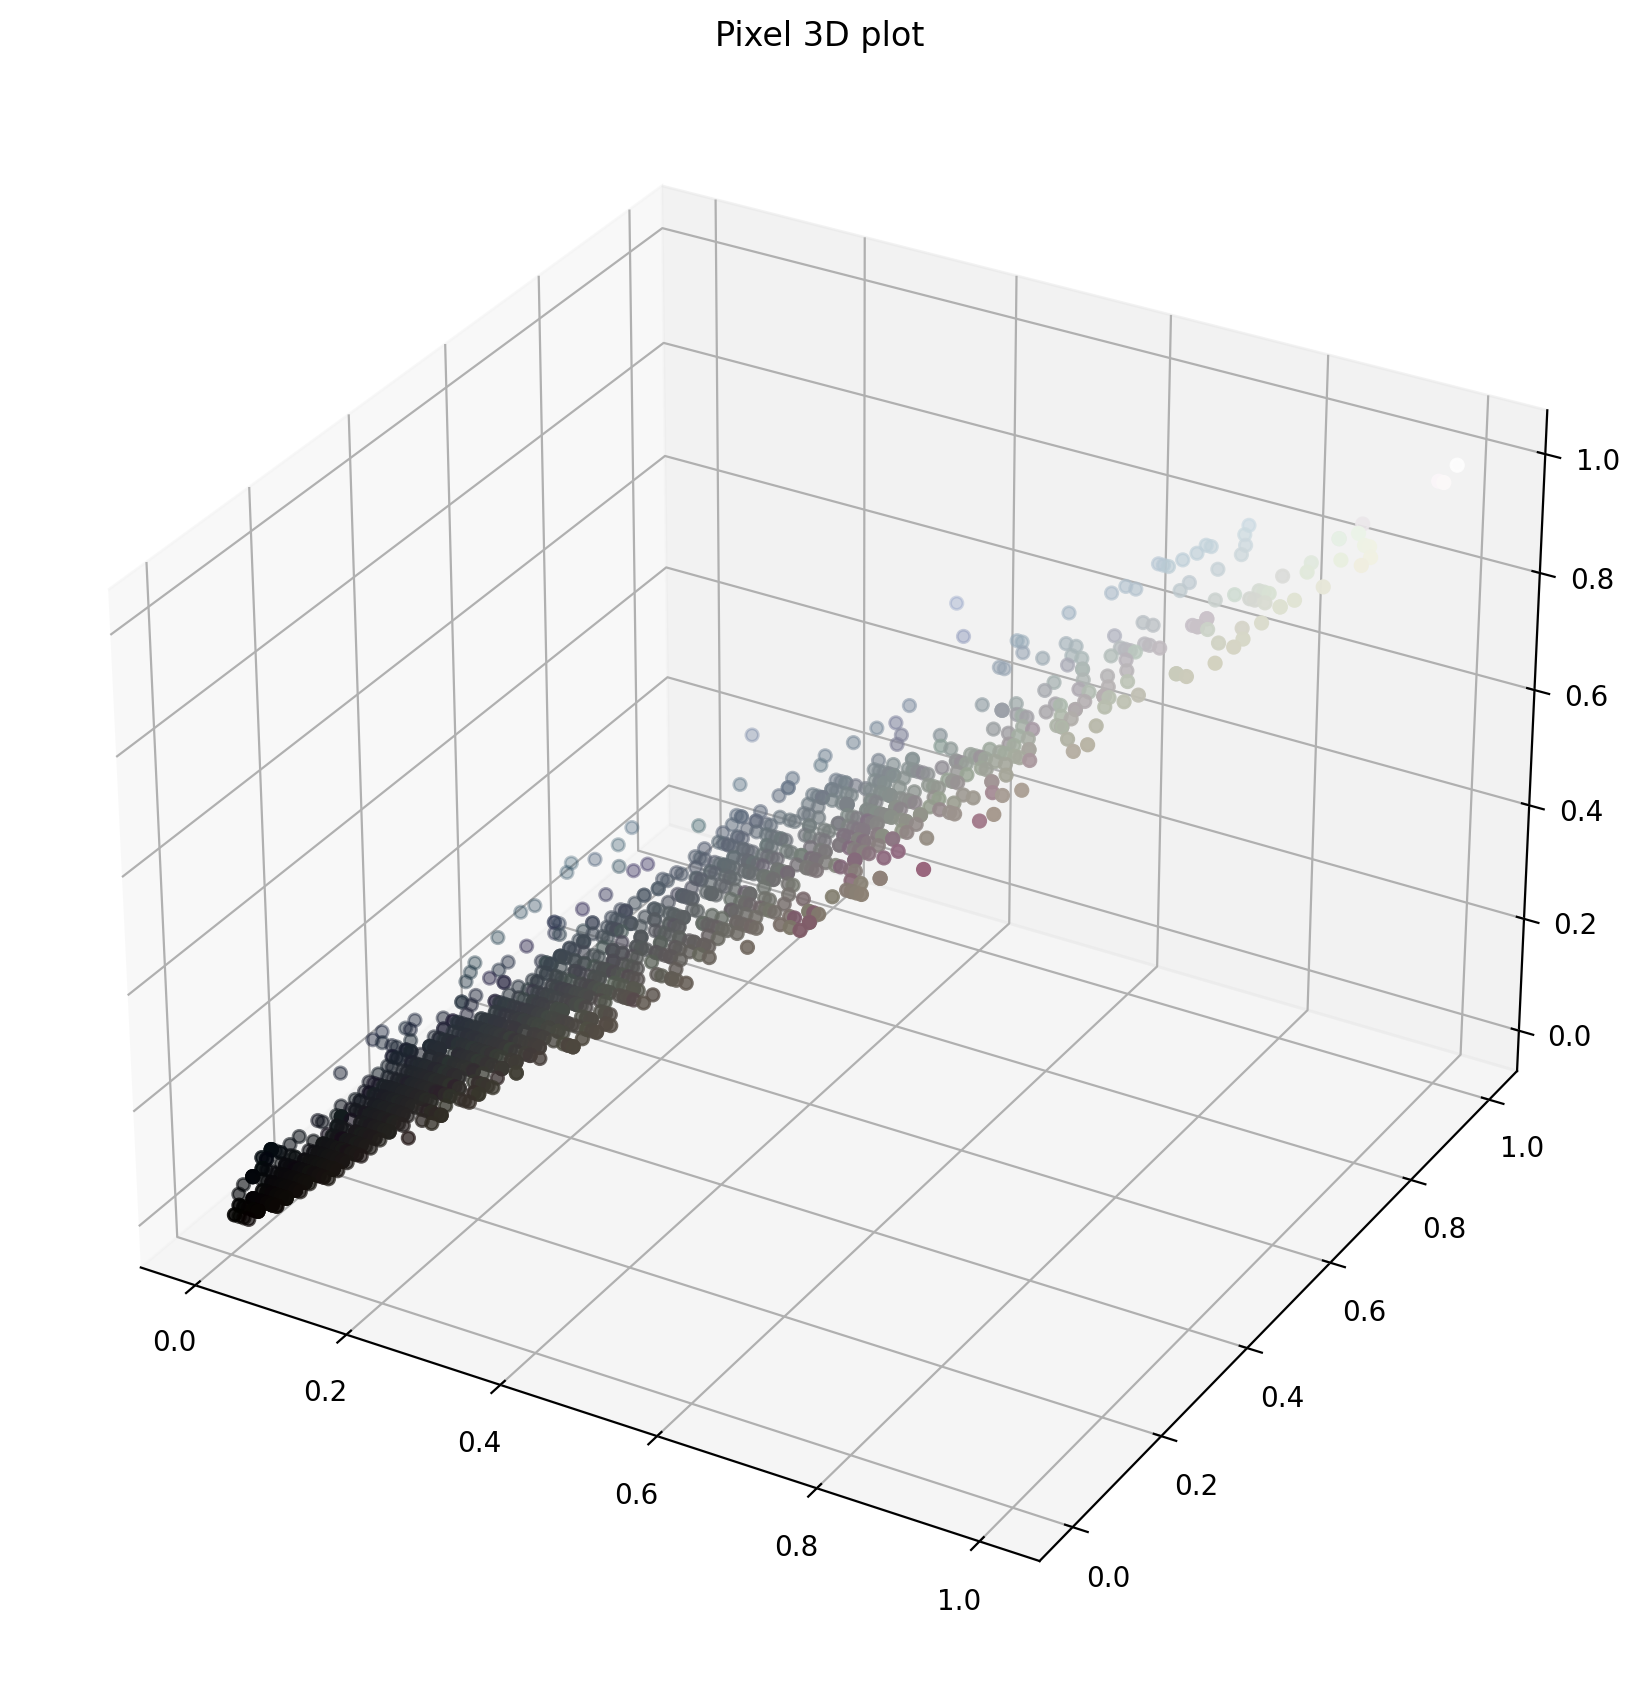

In [69]:
draw_3d_plot(pikachu_vals_scaled.to_numpy())

[[0.13043478 0.11904762 0.10144928]
 [0.26086957 0.30952381 0.23188406]
 [0.52173913 0.52380952 0.55797101]
 ...
 [0.2173913  0.22222222 0.15217391]
 [0.63768116 0.63492063 0.63768116]
 [0.17391304 0.19047619 0.19565217]]


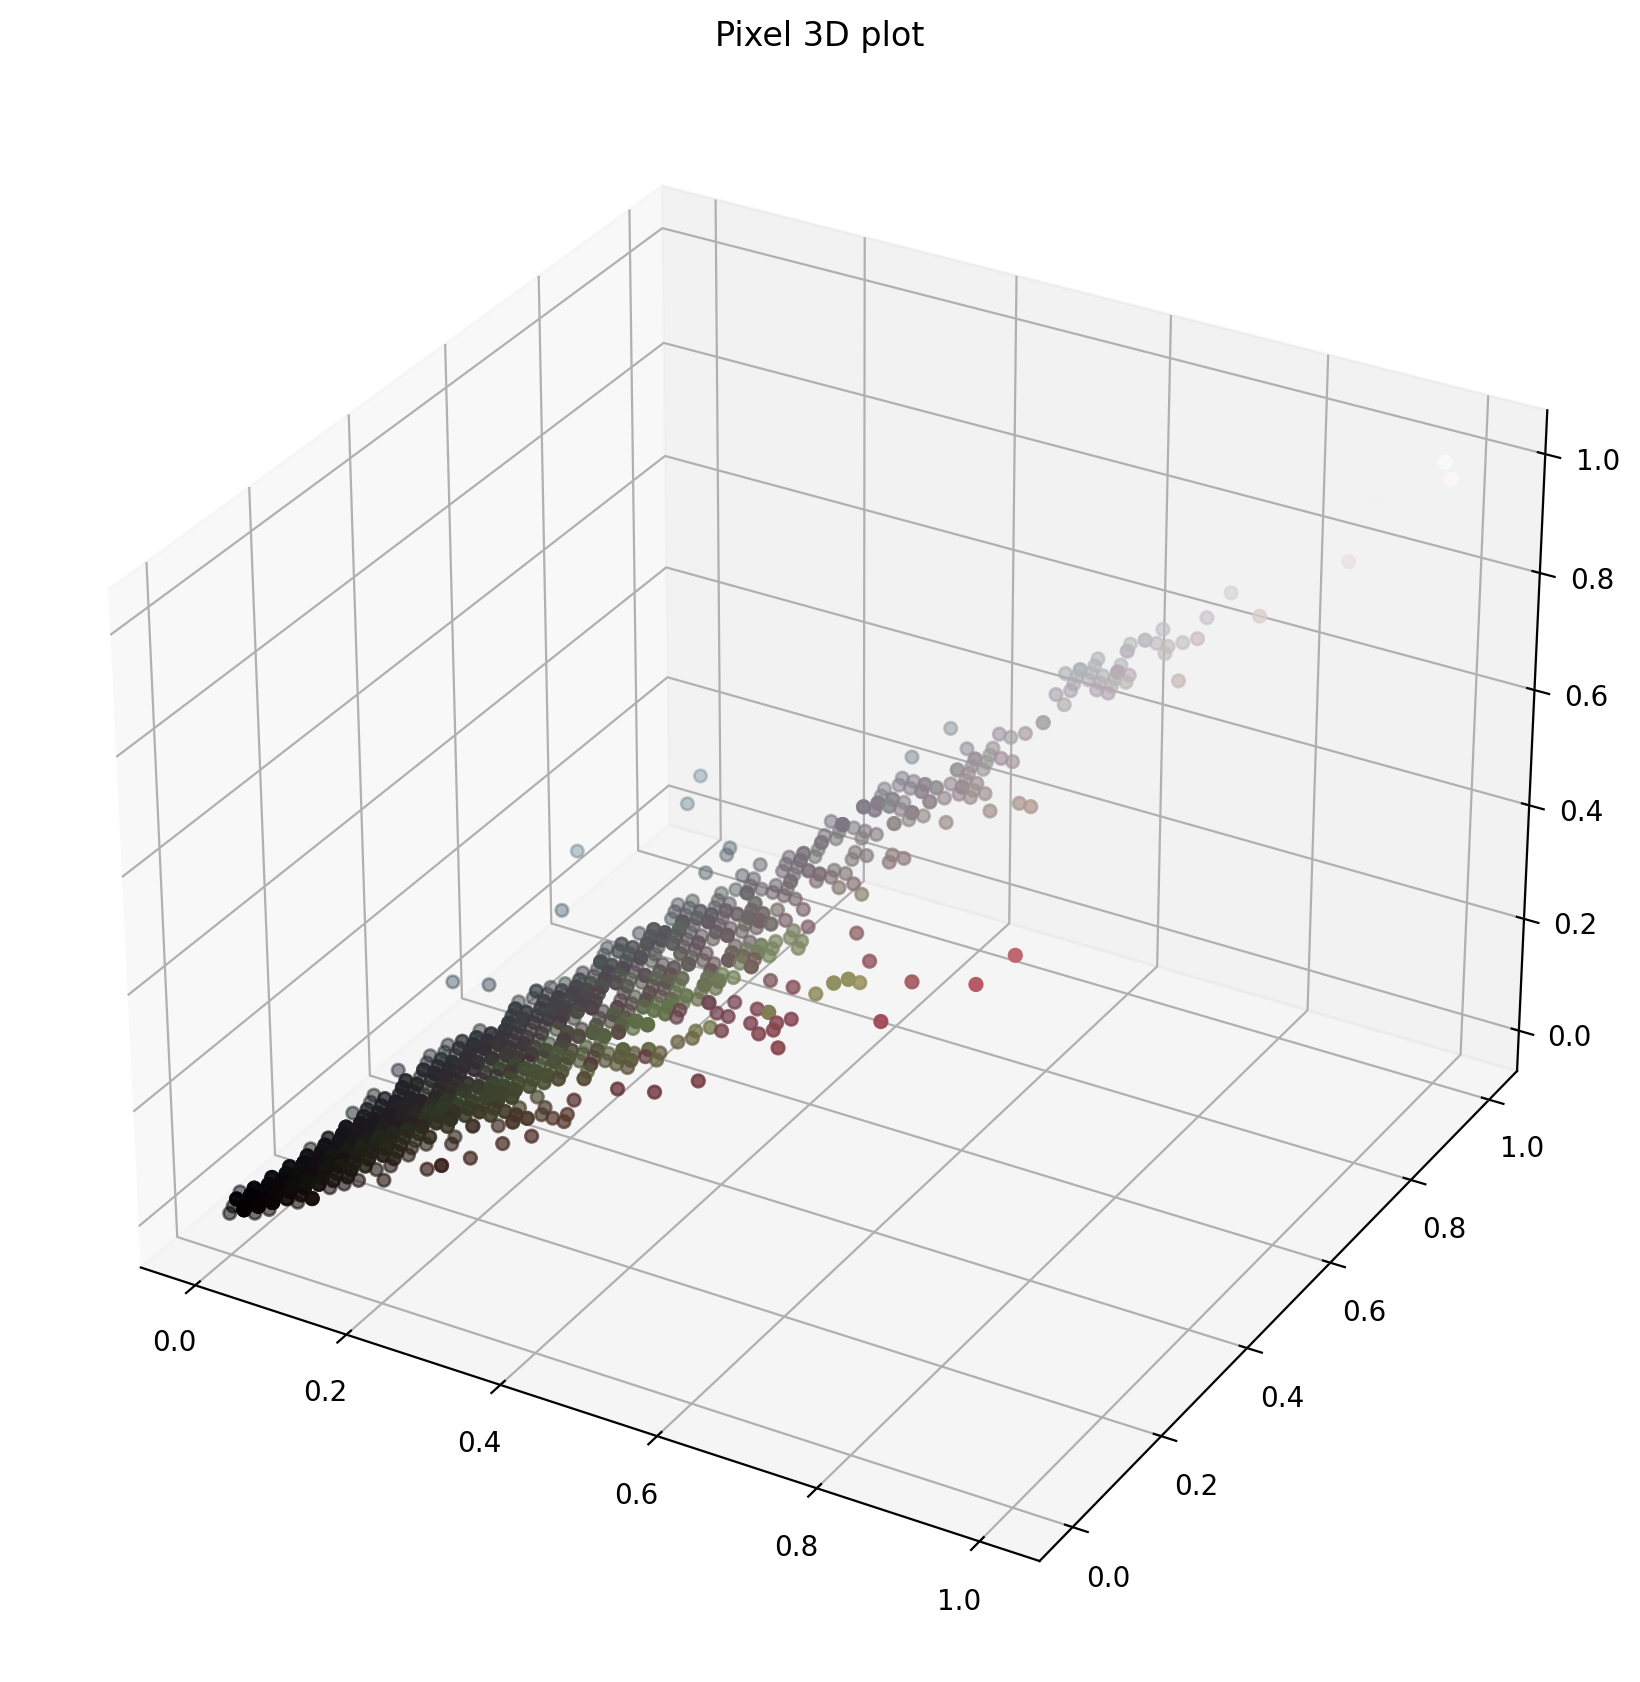

In [70]:
draw_3d_plot(bulbasaur_vals_scaled.to_numpy())

In [61]:
pikachu_vals_scaled.describe()

,Red,Green,Blue
count,2000.000000,2000.000000,2000.000000
mean,68.791092,70.509145,72.734417
std,51.524847,52.606376,52.127279
min,0.000000,0.000000,0.000000
25%,29.050633,29.612903,32.184466
50%,54.873418,55.935484,59.417476
75%,98.449367,103.645161,108.932039
max,255.000000,255.000000,255.000000


In [62]:
n = pikachu_vals_scaled.to_numpy()

In [63]:
n

array([[ 48.41772152,  46.06451613,  37.13592233],
       [117.8164557 , 111.87096774, 106.45631068],
       [ 53.25949367,  54.29032258,  59.41747573],
       ...,
       [109.74683544, 103.64516129, 106.45631068],
       [ 20.98101266,  18.09677419,  17.33009709],
       [151.70886076, 156.29032258, 148.54368932]])

In [67]:
pd.DataFrame(n/256.0, columns=pikachu_vals_scaled.columns).describe()

,Red,Green,Blue
count,2000.000000,2000.000000,2000.000000
mean,0.268715,0.275426,0.284119
std,0.201269,0.205494,0.203622
min,0.000000,0.000000,0.000000
25%,0.113479,0.115675,0.125721
50%,0.214349,0.218498,0.232100
75%,0.384568,0.404864,0.425516
max,0.996094,0.996094,0.996094


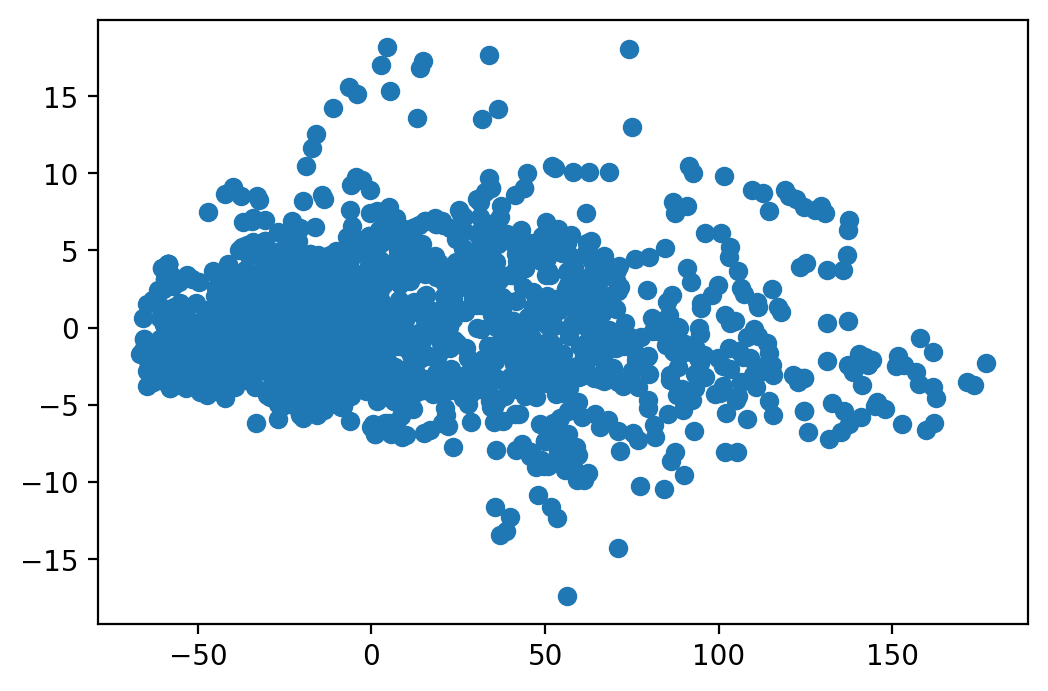

In [76]:
pca = PCA(n_components=2)
pikachu_pca = pca.fit_transform(pikachu_vals)
plt.scatter(pikachu_pca[:, 0], pikachu_pca[:, 1])
plt.show()

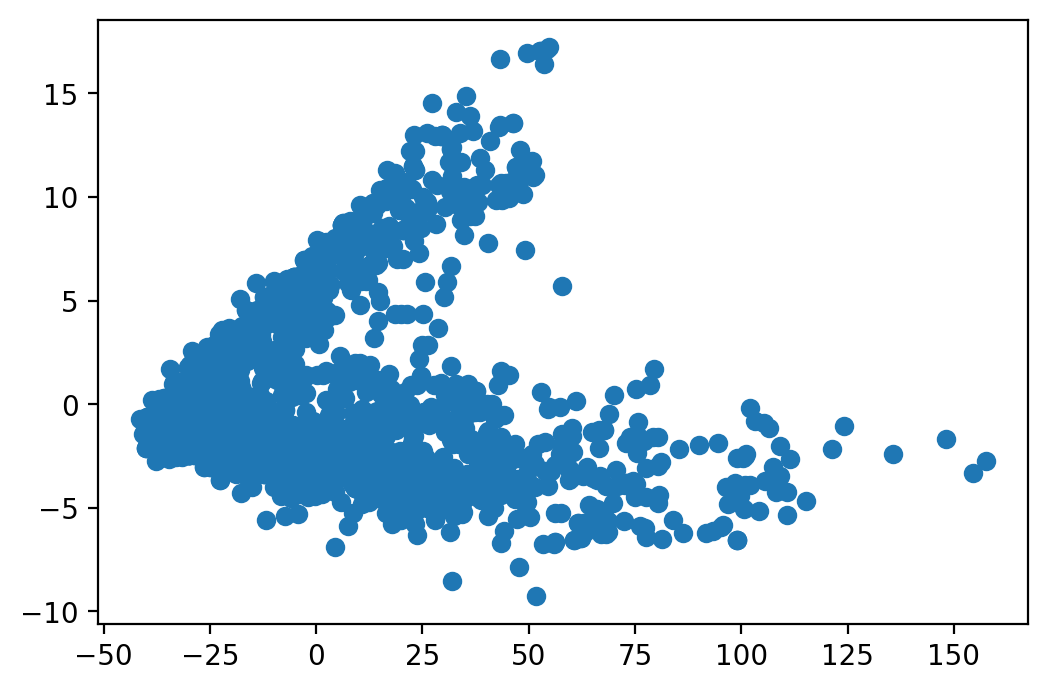

In [77]:
pca = PCA(n_components=2)
bulbasaur_pca = pca.fit_transform(bulbasaur_vals)
plt.scatter(bulbasaur_pca[:, 0], bulbasaur_pca[:, 1])
plt.show()

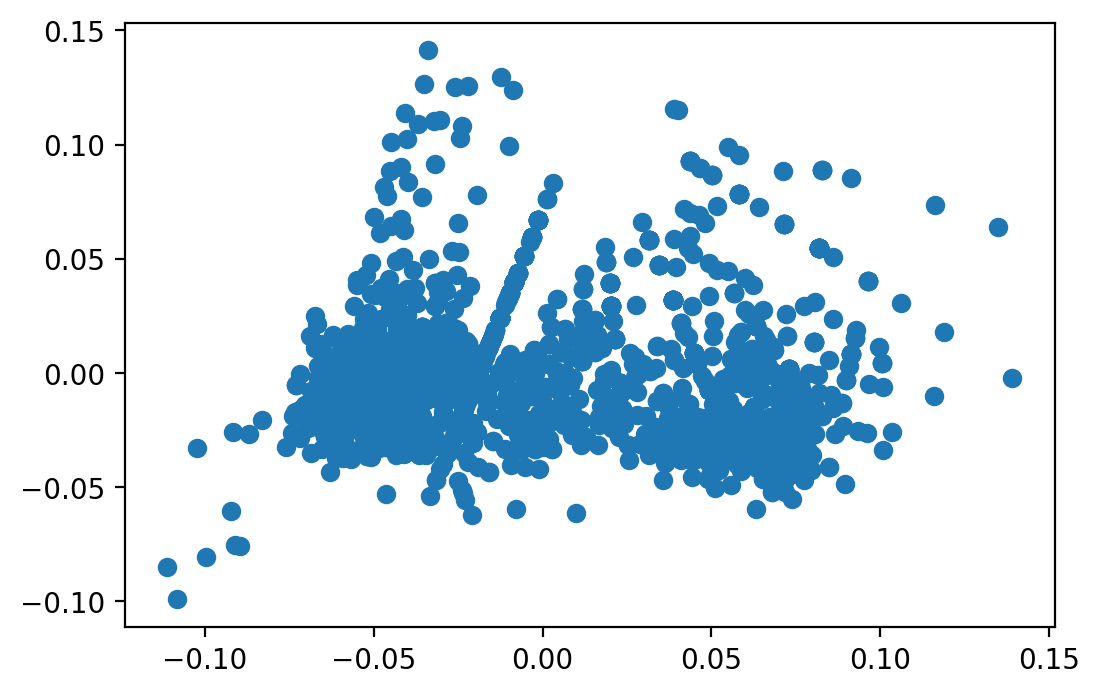

In [97]:
pca = PCA(n_components=2)
bulbasaur_pca = pca.fit_transform(bulbasaur_ratio)
plt.scatter(bulbasaur_pca[:, 0], bulbasaur_pca[:, 1])
plt.show()

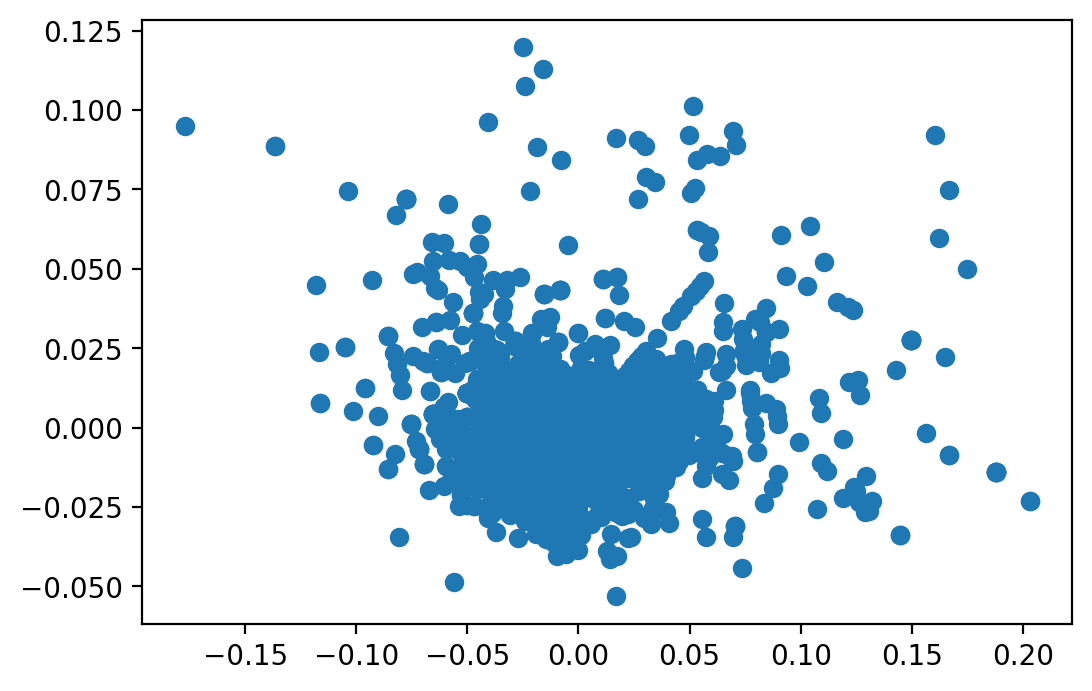

In [98]:
pca = PCA(n_components=2)
pikachu_pca = pca.fit_transform(pikachu_ratio)
plt.scatter(pikachu_pca[:, 0], pikachu_pca[:, 1])
plt.show()

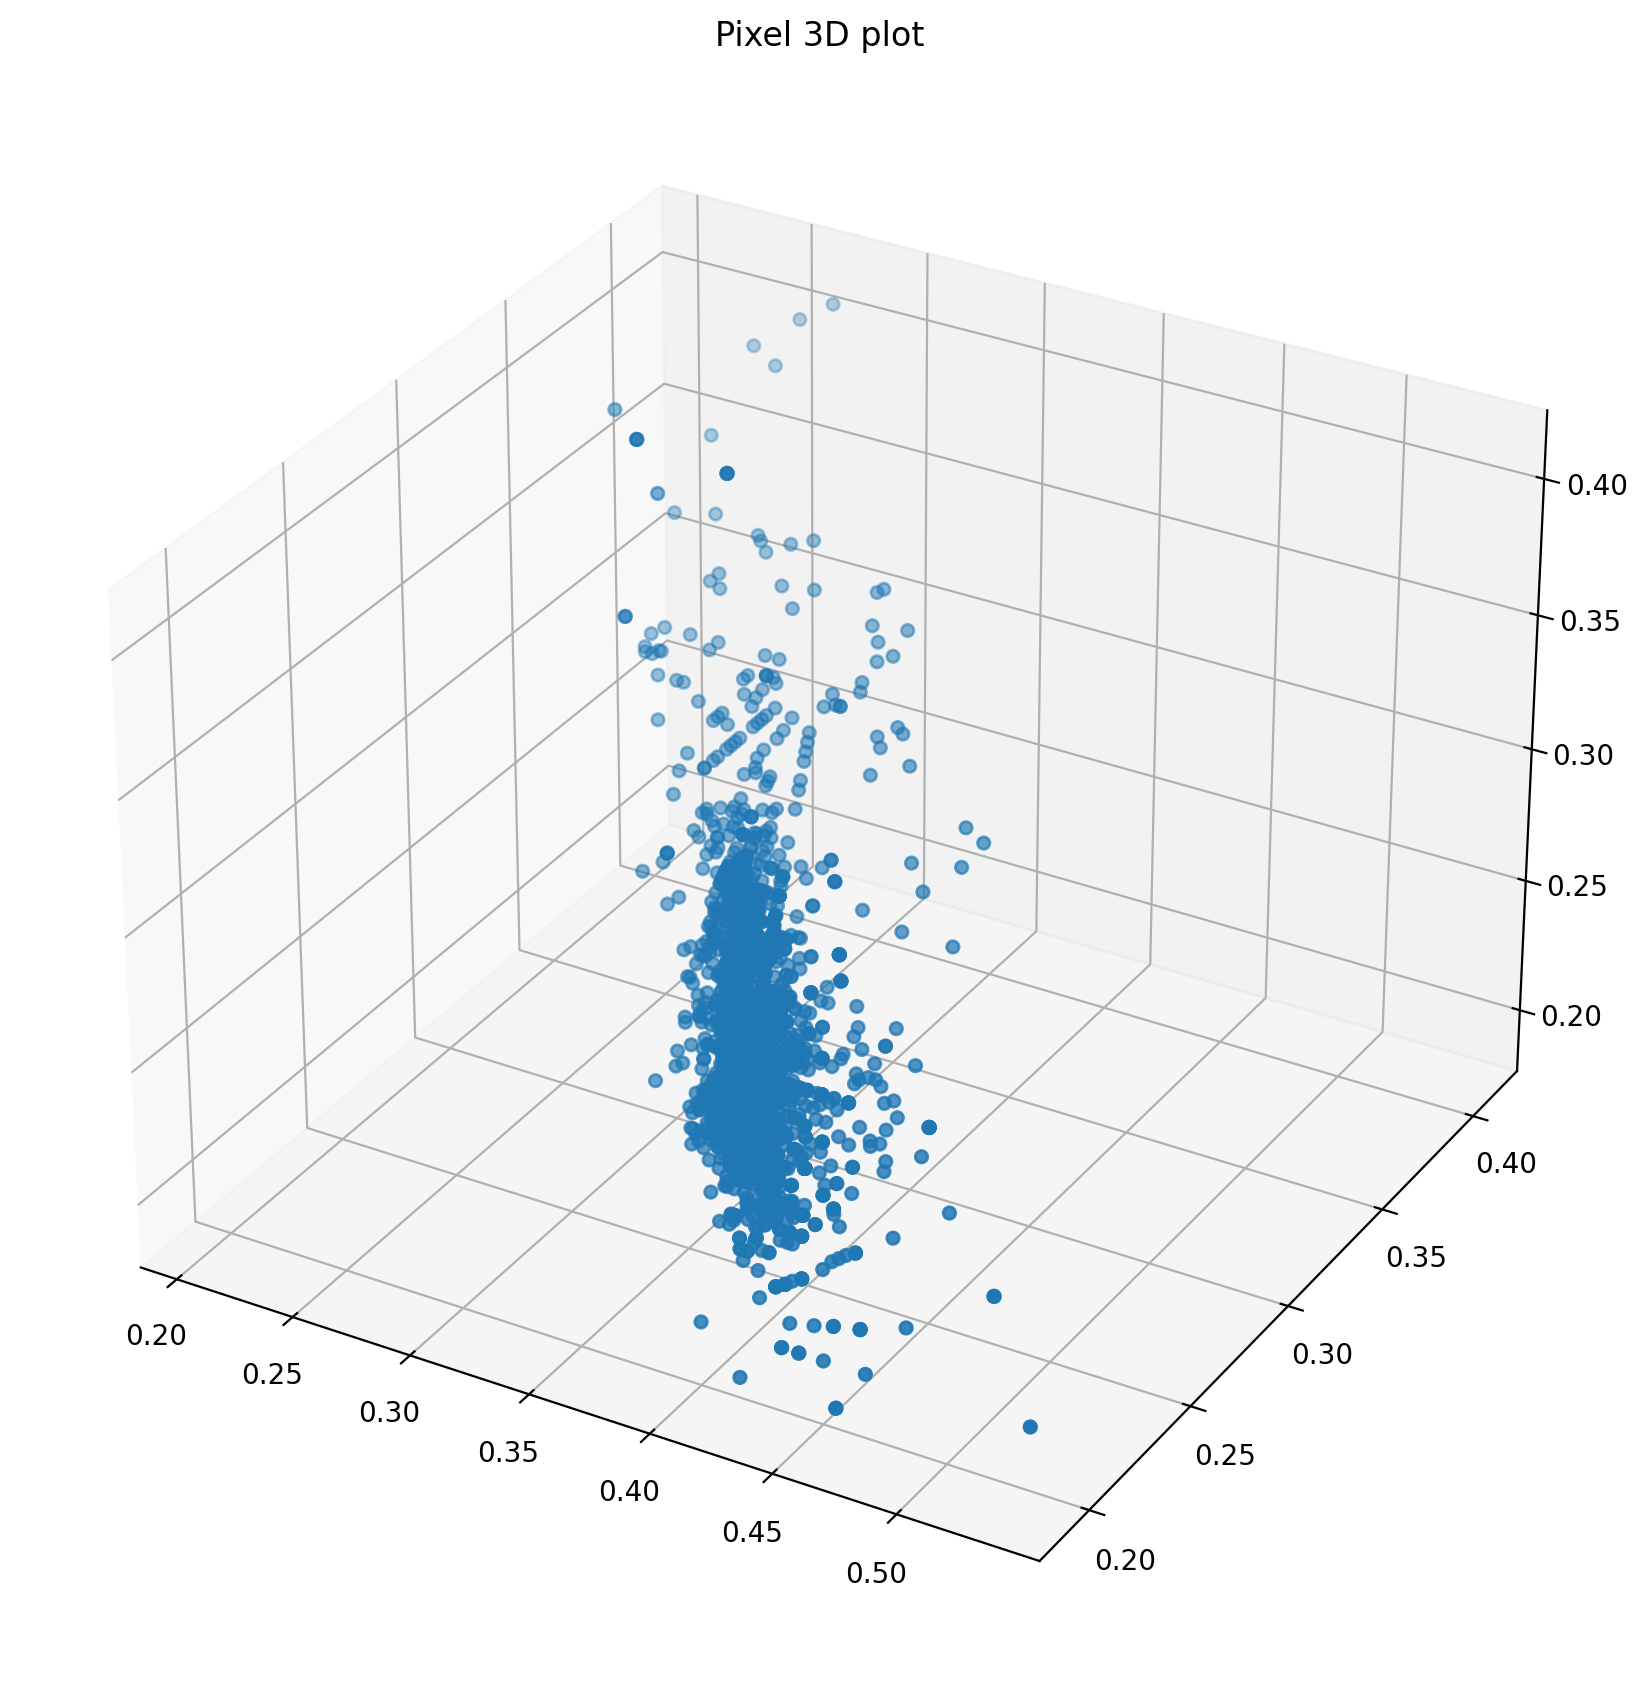

In [99]:
r, g, b = zip(*pikachu_ratio.to_numpy())
r = np.array(r) 
g = np.array(b) 
b = np.array(b) 

fig = plt.figure()
ax = Axes3D(fig)
# range is 0 to 1
ax.scatter(r, g, b)
ax.set_title("Pixel 3D plot")
fig.set_size_inches(14, 8)
plt.show()

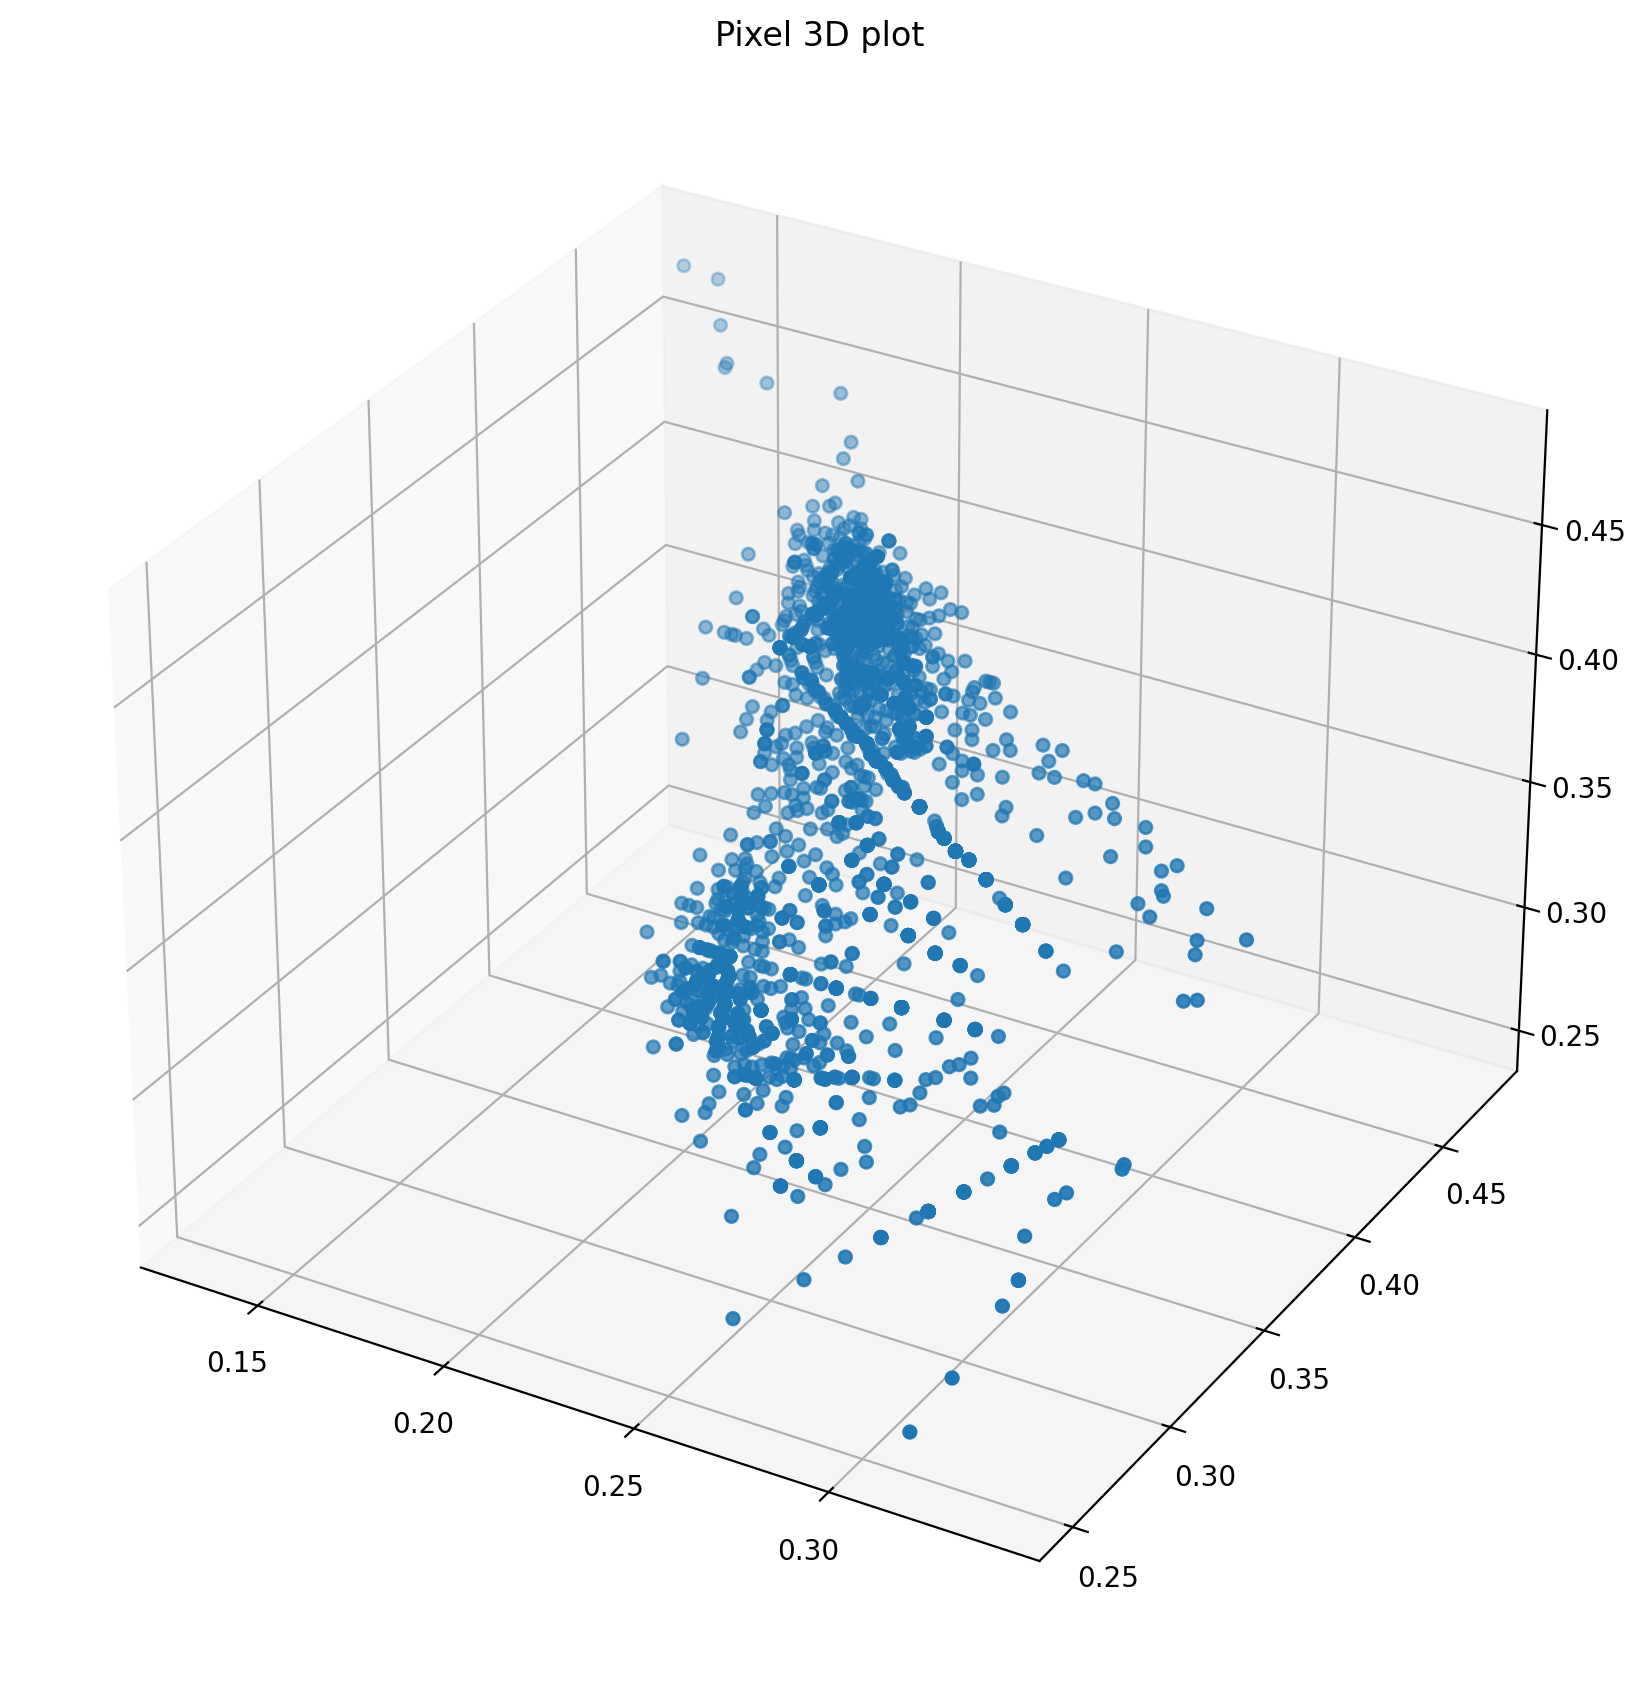

In [100]:
r, g, b = zip(*bulbasaur_ratio.to_numpy())
r = np.array(r) 
g = np.array(b) 
b = np.array(b) 

fig = plt.figure()
ax = Axes3D(fig)
# range is 0 to 1
ax.scatter(r, g, b)
ax.set_title("Pixel 3D plot")
fig.set_size_inches(14, 8)
plt.show()

In [120]:
## Train
X = pd.concat([pikachu[['RedRatio', 'GreenRatio', 'BlueRatio', 'Class']], bulbasaur[['RedRatio', 'GreenRatio', 'BlueRatio', 'Class']]])
y = X.Class
X = X.drop('Class', axis=1)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [126]:
clf = LogisticRegression(random_state=0)
scores = cross_val_score(clf, X_train, y_train, cv=5)

In [127]:
scores

array([0.97142857, 0.97678571, 0.97142857, 0.98035714, 0.96071429])

In [129]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [132]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       601
           1       0.97      0.99      0.98       599

    accuracy                           0.98      1200
   macro avg       0.98      0.98      0.98      1200
weighted avg       0.98      0.98      0.98      1200



In [133]:
X_train

,RedRatio,GreenRatio,BlueRatio
244,0.206,0.368,0.426
301,0.221,0.365,0.413
2443,0.393,0.379,0.229
1651,0.375,0.375,0.250
149,0.339,0.374,0.287
...,...,...,...
2179,0.357,0.378,0.265
315,0.265,0.343,0.392
436,0.338,0.376,0.286
67,0.211,0.414,0.375


In [137]:
pikachu.describe()

,Red,Green,Blue,RedRatio,GreenRatio,BlueRatio,Class
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0
mean,46.623500,46.858500,32.379000,0.370595,0.368914,0.260478,0.0
std,31.925199,31.976424,21.055332,0.031909,0.017359,0.027647,0.0
min,4.000000,4.000000,3.000000,0.208000,0.267000,0.192000,0.0
25%,22.000000,22.000000,16.000000,0.355000,0.362000,0.243000,0.0
50%,38.000000,38.000000,27.000000,0.371000,0.371000,0.257000,0.0
75%,65.000000,67.000000,47.000000,0.389000,0.379000,0.273000,0.0
max,162.000000,159.000000,106.000000,0.533000,0.417000,0.409000,0.0


In [136]:
bulbasaur.describe()

,Red,Green,Blue,RedRatio,GreenRatio,BlueRatio,Class
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0
mean,18.196000,31.676000,30.708500,0.233561,0.396209,0.370193,1.0
std,11.829013,21.067177,22.608762,0.025913,0.033080,0.038896,0.0
min,3.000000,5.000000,3.000000,0.133000,0.295000,0.250000,1.0
25%,9.000000,14.000000,13.000000,0.216000,0.371000,0.333000,1.0
50%,15.000000,27.000000,25.000000,0.228000,0.385000,0.375000,1.0
75%,25.000000,44.000000,43.000000,0.247000,0.424000,0.404000,1.0
max,72.000000,131.000000,141.000000,0.338000,0.478000,0.477000,1.0
